# IMPORT LIBRARIES USED

In [1]:
import csv
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# SPECIFY THE PATH USED

## *Path to current directory*

In [2]:
full_path = os.path.abspath('')
full_path

'e:\\Games\\UnityProject\\HandDetection\\hand-gesture-recognition-using-mediapipe-main'

## *Path to dataset*

In [3]:
dataset = os.path.join(full_path, 'model/keypoint_classifier/keypoint.csv')
dataset = os.path.normpath(dataset)
dataset

'e:\\Games\\UnityProject\\HandDetection\\hand-gesture-recognition-using-mediapipe-main\\model\\keypoint_classifier\\keypoint.csv'

## *Path to where the model is saved*

In [4]:
model_save_path = os.path.join(full_path, 'model/keypoint_classifier/keypoint_classifier1.keras')
model_save_path = os.path.normpath(model_save_path)
model_save_path

'e:\\Games\\UnityProject\\HandDetection\\hand-gesture-recognition-using-mediapipe-main\\model\\keypoint_classifier\\keypoint_classifier.keras'

## *Path to the folder where the model is saved*

In [5]:
saved_model_path = os.path.join(full_path, 'model/keypoint_classifier')
saved_model_path = os.path.normpath(saved_model_path)
saved_model_path

'e:\\Games\\UnityProject\\HandDetection\\hand-gesture-recognition-using-mediapipe-main\\model\\keypoint_classifier'

## *Path to TfLite model*

In [6]:
tflite_save_path = os.path.join(full_path, 'model/keypoint_classifier/keypoint_classifier1.tflite')
tflite_save_path = os.path.normpath(tflite_save_path)
tflite_save_path

'e:\\Games\\UnityProject\\HandDetection\\hand-gesture-recognition-using-mediapipe-main\\model\\keypoint_classifier\\keypoint_classifier.tflite'

# SET THE CLASSIFICATION NUMBER

In [7]:
NUM_CLASSES = 5

# LOAD DATA FOR LEARNING

## *Load data without dependency*

In [8]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

## *Load dependent data (**Label**)*

In [9]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

## *Split the dataset*

### *Value for random state*

In [10]:
RANDOM_SEED = 42

### *Splitting the dataset*

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [16]:
len(y_train)

7595

In [23]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 1485, 1: 1522, 2: 1537, 3: 1535, 4: 1516}

In [24]:
len(y_test)

2532

In [25]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 533, 1: 501, 2: 493, 3: 488, 4: 517}

# CONFIGURE THE LEARNING MODEL

## *Set up model structure*

* Model structure:
> 1. Input Layer
> 2. Dropout(0.2)
> 3. Fully-connected-20 with ReLU as activation
> 4. Dropout(0.4)
> 5. Fully-connected-10 with ReLU as activation
> 6. Fully-connected-4 with SoftMax as activation

In [108]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])
model.name = "Hand_Posture_Regconize_Model"

## *Model summary*

### *Table*

In [109]:
model.summary()  

Model: "Hand_Posture_Regconize_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_6 (Dropout)             │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 30)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 5)              │            55 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,285 (8.93 KB)

 Trainable params: 2,285 (8.93 KB)

 Non-trainable params: 0 (0.00 B)

### *Graph*

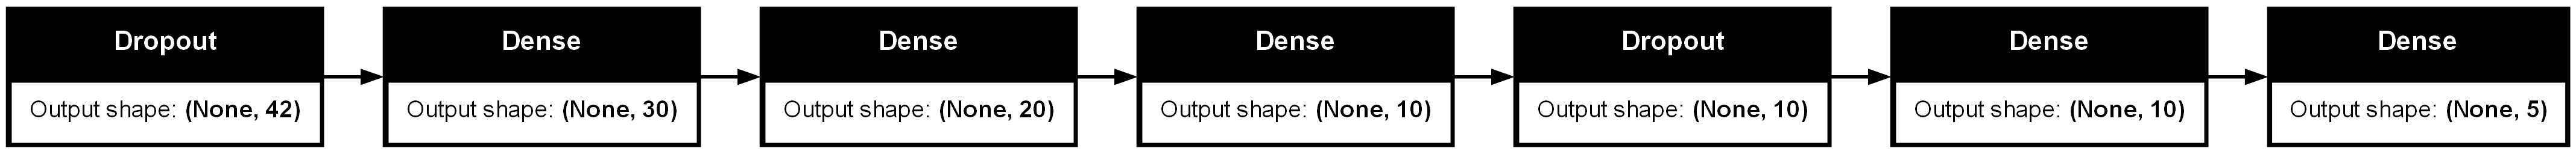

In [110]:
tf.keras.utils.plot_model(model, show_shapes=True, to_file="graph/HandPostureModelStructure1.png", rankdir='LR')

## *Set up callbacks for the model*

### *Model checkpoint callback*

In [111]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)

### *Model early stopping callback*

In [112]:
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

## *Model compilation*

In [113]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# MODEL TRAINING

In [114]:
history = model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


53/60 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - accuracy: 0.2342 - loss: 1.6153
Epoch 1: saving model to e:\Games\UnityProject\HandDetection\hand-gesture-recognition-using-mediapipe-main\model\keypoint_classifier\keypoint_classifier.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2384 - loss: 1.6122 - val_accuracy: 0.4293 - val_loss: 1.5065
Epoch 2/1000
54/60 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - accuracy: 0.3578 - loss: 1.5083
Epoch 2: saving model to e:\Games\UnityProject\HandDetection\hand-gesture-recognition-using-mediapipe-main\model\keypoint_classifier\keypoint_classifier.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3604 - loss: 1.5029 - val_accuracy: 0.5719 - val_loss: 1.2166
Epoch 3/1000
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.4587 - loss: 1.2968
Epoch 3: saving model to e:\Games\UnityProject\HandDetection\hand-gesture-recognition-using-mediapipe-main\model\keypoint_classifier\keypoint_classifier.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a

# MODEL EVALUATION

## *Evaluate validation results*

In [115]:
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.9655 - loss: 0.1267


## *Prediction test*

### *Loading a saved model*

In [116]:
model = tf.keras.models.load_model(model_save_path)

### *Prediction testing*

In [117]:
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
[2.0392565e-05 9.9627459e-01 1.0615026e-03 1.7692655e-03 8.7430974e-04]
1


# CONFUSION MATRIX

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step


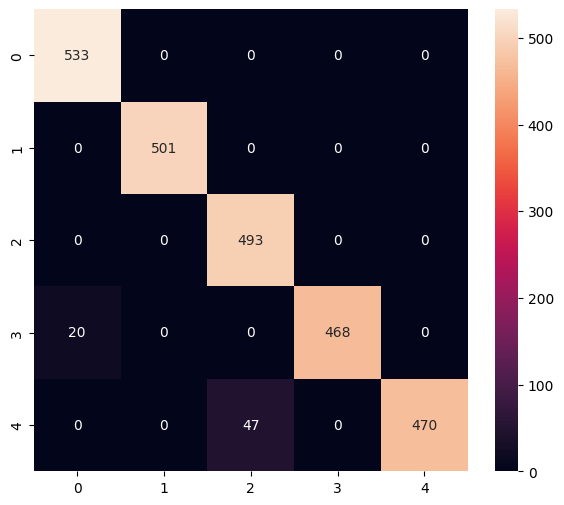

Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       533
           1       1.00      1.00      1.00       501
           2       0.91      1.00      0.95       493
           3       1.00      0.96      0.98       488
           4       1.00      0.91      0.95       517

    accuracy                           0.97      2532
   macro avg       0.98      0.97      0.97      2532
weighted avg       0.98      0.97      0.97      2532



In [118]:
def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.savefig("graph/HandPostureModelConfusionMatrix1.png")
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# TRAINING HISTORY OF THE MODEL

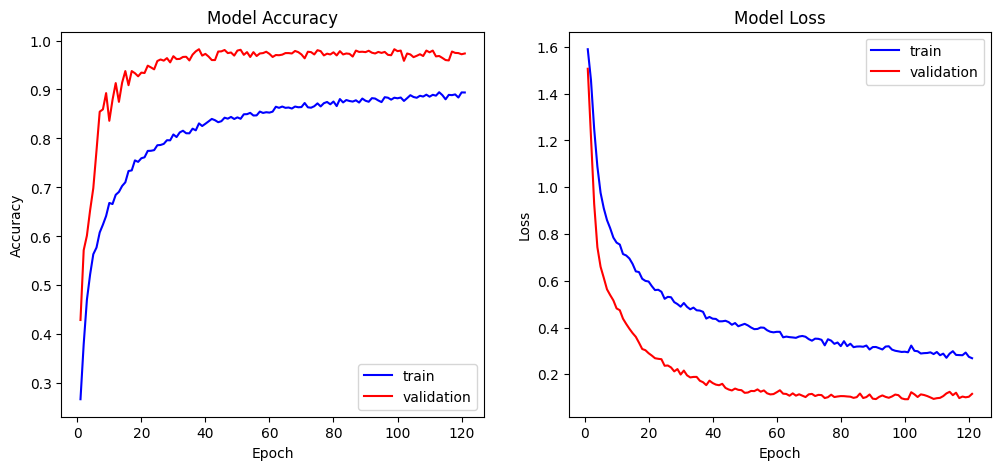

In [119]:
def plot_history(history):
    acc = history.history["accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    val_accuracy = history.history["val_accuracy"]
    
    x = range(1, len(acc) + 1)
    
    plt.figure(figsize=(12,5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, "b", label="train")
    plt.plot(x, val_accuracy, "r", label="validation")
    plt.legend(loc="best")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Model Accuracy")
    
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, "b", label="train")
    plt.plot(x, val_loss, "r", label="validation")
    plt.legend(loc="best")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Model Loss")
    
    plt.savefig("graph/HandPostureModelTrainingHistory1.png")
    
plot_history(history)

# MODEL CONVERTING FOR TensorFlow-Lite

## *Model export*

In [120]:
# model.save(model_save_path, include_optimizer=False)
model.export(filepath=saved_model_path, format="tf_saved_model")


INFO:tensorflow:Assets written to: e:\Games\UnityProject\HandDetection\hand-gesture-recognition-using-mediapipe-main\model\keypoint_classifier\assets


INFO:tensorflow:Assets written to: e:\Games\UnityProject\HandDetection\hand-gesture-recognition-using-mediapipe-main\model\keypoint_classifier\assets


Saved artifact at 'e:\Games\UnityProject\HandDetection\hand-gesture-recognition-using-mediapipe-main\model\keypoint_classifier'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_3')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  1776400434272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1776400435504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1776400447824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1776400436032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1776400447472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1776400449232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1776400444832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1776400433744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1776294294128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1776294295008: Tens

## *Load the exported model*

In [121]:
model = tf.keras.models.load_model(model_save_path)

## *Transform the model (**quantize**)*

In [122]:
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)

converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [
  tf.lite.OpsSet.TFLITE_BUILTINS, # enable TensorFlow Lite ops.
  tf.lite.OpsSet.SELECT_TF_OPS # enable TensorFlow ops.
]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

9128

# REASONING TEST

## *Set up an interpreter*

In [123]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

## *Get input tensor*

In [124]:
input_details = interpreter.get_input_details()

## *Get output tensor*

In [125]:
output_details = interpreter.get_output_details()

## *Set the value for the input tensor*

In [126]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

## *Inference implementation*

In [127]:
%%time
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


## *Print the results*

In [128]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.6873752e-05 9.9637657e-01 1.0061827e-03 1.6798795e-03 9.2050637e-04]
1
